<a href="https://colab.research.google.com/github/rishabh135/2015/blob/master/Resnet50_eigenvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenvalues

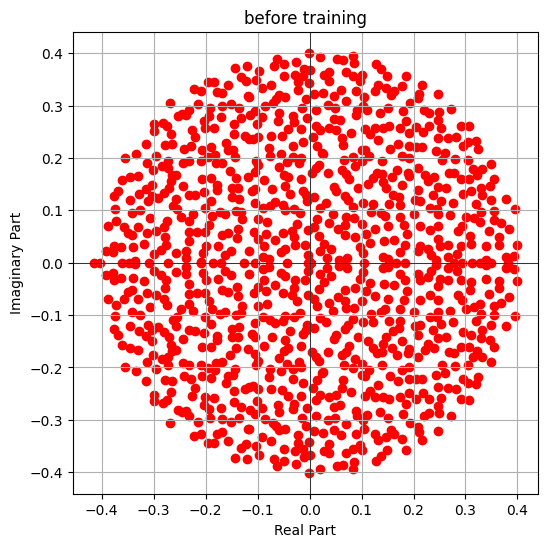

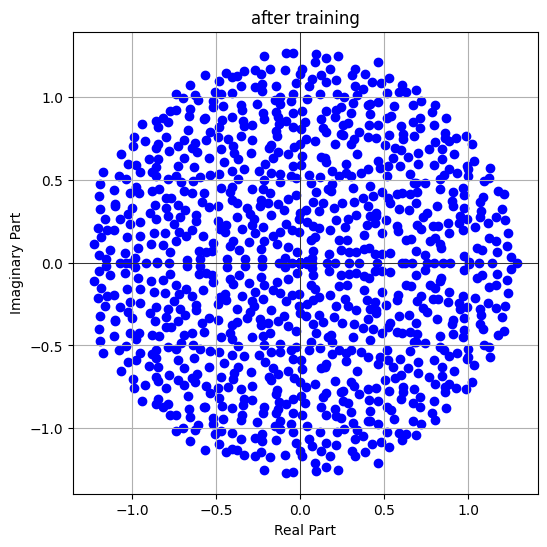

In [ ]:
import numpy as np
def visualize_eigs(array, label, color):
    pad_size = max(array.shape)
    pad_height = pad_size - array.shape[0]
    pad_width = pad_size - array.shape[1]
    square = np.pad(array, ((0, pad_height), (0, pad_width)))

    eigenvalues = np.linalg.eigvals(square)
    # Extract real and imaginary parts
    real_parts = eigenvalues.real
    imag_parts = eigenvalues.imag

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(real_parts, imag_parts, color=color)
    plt.title(label)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.show()

from torchvision.models import resnet50, ResNet50_Weights
import numpy as np
import matplotlib.pyplot as plt


net=resnet50(weights=None)
visualize_eigs(net.fc.weight.cpu().detach().numpy(), "before training", "red")

net=resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
visualize_eigs(net.fc.weight.cpu().detach().numpy(), "after training", "blue")

# Singular values

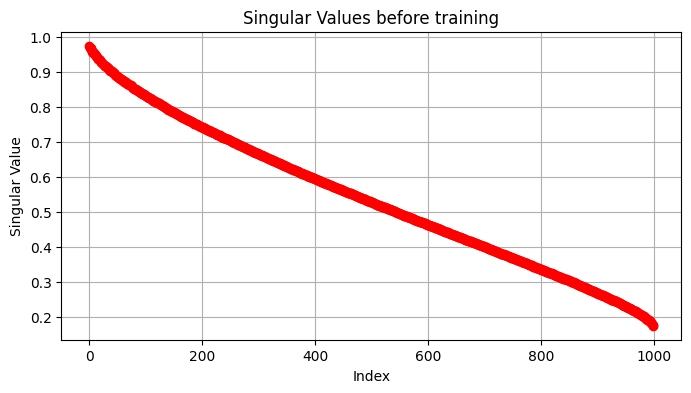

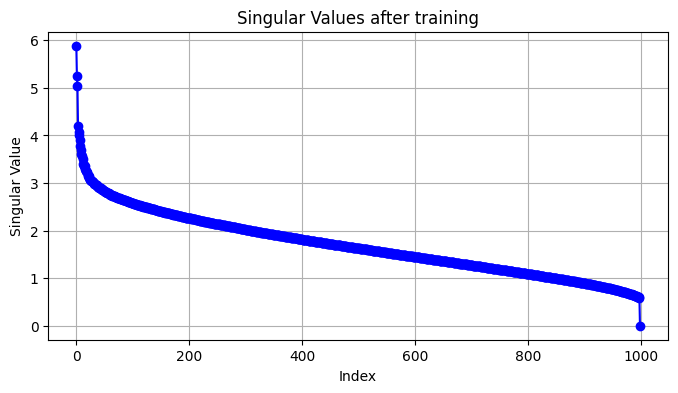

In [ ]:
weight0=resnet50(weights=None).fc.weight.cpu().detach().numpy()
weight1=resnet50(weights=ResNet50_Weights.IMAGENET1K_V2).fc.weight.cpu().detach().numpy()

# Plot singular values
U, singular_values, Vt = np.linalg.svd(weight0, full_matrices=False)

plt.figure(figsize=(8, 4))
plt.plot(singular_values, 'o-', color='red')
plt.title('Singular Values before training')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# Plot singular values
U, singular_values, Vt = np.linalg.svd(weight1, full_matrices=False)

plt.figure(figsize=(8, 4))
plt.plot(singular_values, 'o-', color='blue')
plt.title('Singular Values after training')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()